<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model_v1.2%202324%20Season%2015.08.2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/doughagey/UnderstatScraper

Cloning into 'UnderstatScraper'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 11), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (34/34), 268.30 KiB | 5.83 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '1wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '1'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table,'1wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '1'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table, '1wks')

print('Merging Tables')
EPL_player_df = pd.merge(one_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, one_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 1 matches
Merging Tables
Writing CSV File


In [5]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,assists_1wks_y,xA_1wks_y,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,5232,Alexander Isak,1,79,2,1.1635656356811523,0,0,3,0,...,0,0,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133
1,8260,Erling Haaland,1,85,2,0.8820623755455017,0,0.21824727952480316,4,2,...,0,0.21824727952480316,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092
2,468,Callum Wilson,1,11,1,1.220109462738037,0,0,4,0,...,0,0,4,0,0,0,1,1.220109462738037,1.220109462738037,0
3,1679,Dominic Solanke,1,90,1,1.2082340717315674,0,0.08136165887117386,3,2,...,0,0.08136165887117386,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0
4,1776,Jarrod Bowen,1,90,1,0.38786593079566956,0,0.6426277756690979,6,3,...,0,0.6426277756690979,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,11723,Alfie Doughty,1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,11729,Bénie Traoré,1,88,0,0,0,0.23848271369934082,0,2,...,0,0.23848271369934082,0,2,0,0,0,0,0.23848271369934082,0
299,11730,Anis Ben Slimane,1,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
300,11731,Andre Brooks,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_game_df.to_csv('one_game_df.csv', encoding='utf-8', index=False)
one_game_df['time'] = one_game_df['time'].astype(int)
one_game_df = one_game_df[one_game_df['time'] > 40]
one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
one_game_df['xgdifference'] = one_game_df.goals_1wks - one_game_df.xG_1wks
one_game_df['assists_1wks'] = one_game_df['assists_1wks'].astype(int)
one_game_df['xA_1wks'] = one_game_df['xA_1wks'].astype(float)
one_game_df['xAdifference'] = one_game_df.assists_1wks - one_game_df.xA_1wks
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

<ipython-input-6-30b8c2331977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
<ipython-input-6-30b8c2331977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
<ipython-input-6-30b8c2331977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
97,3621,Neal Maupay,1,0,1.137312,0,0.133534,4,1,0,1.1373118162155151,1.2708455324172974,0,-1.137312,-0.133534
291,11716,Pelly Ruddock Mpanzu,1,0,0.903205,0,0.000000,2,0,0,0.9032046794891357,0.9032046794891357,0,-0.903205,0.000000
242,10048,Nicolas Jackson,1,0,0.843949,0,0.000000,4,0,0,0.8439493179321289,0.8439493179321289,0,-0.843949,0.000000
152,7080,Matheus Cunha,1,0,0.691767,0,0.063966,5,1,0,0.6917670369148254,0.7154462337493896,0,-0.691767,-0.063966
191,8288,Tomas Soucek,1,0,0.597372,1,0.030216,2,1,0,0.5973717570304871,0.23227214813232422,0.2020566314458847,-0.597372,0.969784
208,8864,Matthew Cash,1,0,0.559879,0,0.000000,2,0,0,0.5598788857460022,0.6570658683776855,0.09718701988458633,-0.559879,0.000000
198,8706,Eberechi Eze,1,0,0.527629,0,0.835754,8,7,0,0.5276288986206055,1.364763855934143,0.741253674030304,-0.527629,-0.835754
79,1726,Abdoulaye Doucouré,1,0,0.482588,0,0.774097,2,3,0,0.48258814215660095,1.2317713499069214,0,-0.482588,-0.774097
246,10292,Nathan Patterson,1,0,0.435830,0,0.000000,3,0,0,0.43583041429519653,0.5179679989814758,0.09493032842874527,-0.435830,0.000000
21,8272,João Pedro,1,1,1.425406,0,0.012145,4,1,0,0.6642370223999023,0.9390615820884705,0.2748245596885681,-0.425406,-0.012145


In [7]:
sortXgDifference.tail(10)

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
15,6885,Axel Disasi,1,1,0.673288,0,0.000000,2,0,1,0.6732882261276245,0.9005272388458252,0.9005272388458252,0.326712,0.000000
9,6049,Solly March,1,1,0.595876,0,0.058909,3,2,1,0.5958764553070068,0.6235096454620361,0,0.404124,-0.058909
4,1776,Jarrod Bowen,1,1,0.387866,0,0.642628,6,3,1,0.38786593079566956,0.5210804343223572,0.13321448862552643,0.612134,-0.642628
12,6556,Moussa Diaby,1,1,0.306527,0,0.365253,3,2,1,0.30652743577957153,0.6717802286148071,0.09718701988458633,0.693473,-0.365253
17,7322,Bukayo Saka,1,1,0.235291,0,0.149431,3,3,1,0.23529092967510223,0.5473158359527588,0.31885504722595215,0.764709,-0.149431
10,6482,Eddie Nketiah,1,1,0.229012,0,0.000000,3,0,1,0.22901201248168945,0.22212177515029907,0.14309196174144745,0.770988,0.000000
8,5786,Yoane Wissa,1,1,0.200507,0,0.074771,3,2,1,0.20050744712352753,0.22781415283679962,0,0.799493,-0.074771
0,5232,Alexander Isak,1,2,1.163566,0,0.000000,3,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133,0.836434,0.000000
18,7430,Emerson,1,1,0.032621,0,0.000000,1,0,1,0.03262129798531532,0.30280500650405884,0.2701837122440338,0.967379,0.000000
1,8260,Erling Haaland,1,2,0.882062,0,0.218247,4,2,2,0.8820623755455017,0.6133584380149841,0.01889444887638092,1.117938,-0.218247


In [8]:
one_game_df

,id,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,5232,Alexander Isak,1,79,2,1.163566,0,0.000000,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133,0.836434,0.000000
1,8260,Erling Haaland,1,85,2,0.882062,0,0.218247,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092,1.117938,-0.218247
3,1679,Dominic Solanke,1,90,1,1.208234,0,0.081362,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0,-0.208234,-0.081362
4,1776,Jarrod Bowen,1,90,1,0.387866,0,0.642628,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643,0.612134,-0.642628
5,2245,Raphael Varane,1,90,1,0.891438,0,0.000000,2,0,0,0,1,0.891437828540802,1.0924830436706543,0.3034017086029053,0.108562,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,11714,Tom Lockyer,1,90,0,0.000000,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000
290,11715,Mads Andersen,1,77,0,0.000000,0,0.000000,0,0,1,0,0,0,0.04231686517596245,0.04231686517596245,0.000000,0.000000
291,11716,Pelly Ruddock Mpanzu,1,89,0,0.903205,0,0.000000,2,0,0,0,0,0.9032046794891357,0.9032046794891357,0,-0.903205,0.000000
292,11718,Elijah Adebayo,1,65,0,0.000000,0,0.066602,0,1,0,0,0,0,0.10891849547624588,0.04231686517596245,0.000000,-0.066602


In [9]:
onegamedftidy = one_game_df.drop(columns=[
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
onegamedftidy

,id,player_name,games,xG_1wks,xA_1wks
0,5232,Alexander Isak,1,1.163566,0.000000
1,8260,Erling Haaland,1,0.882062,0.218247
3,1679,Dominic Solanke,1,1.208234,0.081362
4,1776,Jarrod Bowen,1,0.387866,0.642628
5,2245,Raphael Varane,1,0.891438,0.000000
...,...,...,...,...,...
289,11714,Tom Lockyer,1,0.000000,0.000000
290,11715,Mads Andersen,1,0.000000,0.000000
291,11716,Pelly Ruddock Mpanzu,1,0.903205,0.000000
292,11718,Elijah Adebayo,1,0.000000,0.066602


In [10]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


Cloning into 'fpl-mappers'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 94 (delta 32), reused 89 (delta 30), pack-reused 0
Receiving objects: 100% (94/94), 217.69 KiB | 5.44 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Cloning into 'FPL-ID-Map'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 242 (delta 176), reused 188 (delta 122), pack-reused 0
Receiving objects: 100% (242/242), 273.05 KiB | 6.21 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [11]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2,
                     data1,
                     on ='code',
                     how ='left')
understatid = understatwithfplid1.drop(columns=[
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
one_game_df.rename(columns={'id': 'understat'}, inplace=True)
one_game_df

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,5232,Alexander Isak,1,79,2,1.163566,0,0.000000,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133,0.836434,0.000000
1,8260,Erling Haaland,1,85,2,0.882062,0,0.218247,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092,1.117938,-0.218247
3,1679,Dominic Solanke,1,90,1,1.208234,0,0.081362,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0,-0.208234,-0.081362
4,1776,Jarrod Bowen,1,90,1,0.387866,0,0.642628,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643,0.612134,-0.642628
5,2245,Raphael Varane,1,90,1,0.891438,0,0.000000,2,0,0,0,1,0.891437828540802,1.0924830436706543,0.3034017086029053,0.108562,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,11714,Tom Lockyer,1,90,0,0.000000,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000
290,11715,Mads Andersen,1,77,0,0.000000,0,0.000000,0,0,1,0,0,0,0.04231686517596245,0.04231686517596245,0.000000,0.000000
291,11716,Pelly Ruddock Mpanzu,1,89,0,0.903205,0,0.000000,2,0,0,0,0,0.9032046794891357,0.9032046794891357,0,-0.903205,0.000000
292,11718,Elijah Adebayo,1,65,0,0.000000,0,0.066602,0,1,0,0,0,0,0.10891849547624588,0.04231686517596245,0.000000,-0.066602


In [12]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

Cloning into 'FPL-API-Fixture-modeler'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 39 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 351.41 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [16]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
1933,11301,695.0
1934,11146,632.0
1935,11189,646.0
1936,11302,696.0


In [17]:
new_df

,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
1933,11301,695.0
1934,11146,632.0
1935,11189,646.0
1936,11302,696.0


In [18]:
one_game_df["understat"] = one_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(one_game_df,
                     understatid2,
                     on ='understat',
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,5232,Alexander Isak,1,79,2,1.163566,0,0.000000,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133,0.836434,0.000000,594.0
1,8260,Erling Haaland,1,85,2,0.882062,0,0.218247,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092,1.117938,-0.218247,318.0
2,1679,Dominic Solanke,1,90,1,1.208234,0,0.081362,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0,-0.208234,-0.081362,66.0
3,1776,Jarrod Bowen,1,90,1,0.387866,0,0.642628,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643,0.612134,-0.642628,465.0
4,2245,Raphael Varane,1,90,1,0.891438,0,0.000000,2,0,0,0,1,0.891437828540802,1.0924830436706543,0.3034017086029053,0.108562,0.000000,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,11714,Tom Lockyer,1,90,0,0.000000,0,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,NaN
218,11715,Mads Andersen,1,77,0,0.000000,0,0.000000,0,0,1,0,0,0,0.04231686517596245,0.04231686517596245,0.000000,0.000000,NaN
219,11716,Pelly Ruddock Mpanzu,1,89,0,0.903205,0,0.000000,2,0,0,0,0,0.9032046794891357,0.9032046794891357,0,-0.903205,0.000000,NaN
220,11718,Elijah Adebayo,1,65,0,0.000000,0,0.066602,0,1,0,0,0,0,0.10891849547624588,0.04231686517596245,0.000000,-0.066602,NaN


In [49]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [50]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [51]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [52]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
playerdata['fpl_id'] = playerdata['id']
fplwithunderstat = pd.merge(playerdata,
                     understatwithfplid,
                     on ='id',
                     how ='left')
master = fplwithunderstat.drop(columns=[
'goals_scored',
 'ict_index',
 'points_per_game',
 'player_name',
 'id',
 'selected_by_percent',
 'goals_scored',
 'assists',
 'ict_index',
 'points',
 'points_per_game',
 'understat',
 'player_name',
 'games',
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'
 ])
master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
master['BPS90'] = master.bps/(master.minutes/90)

In [53]:
understatwithfplid.dtypes

understat            int64
player_name         object
games               object
time                 int64
goals_1wks           int64
xG_1wks            float64
assists_1wks         int64
xA_1wks            float64
shots_1wks          object
key_passes_1wks     object
yellow_cards        object
red_cards           object
npg_1wks            object
npxG_1wks           object
xGChain             object
xGBuildup           object
xgdifference       float64
xAdifference       float64
id                 float64
dtype: object

In [54]:
playerdata

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,fpl_id
0,1,Arsenal,F,Balogun,4.5,0.7,0,0,0,0.0,0,0.0,0,1
1,2,Arsenal,D,Cédric,4.0,0.4,0,0,0,0.0,0,0.0,0,2
2,3,Arsenal,M,M.Elneny,4.5,0.1,0,0,0,0.0,0,0.0,0,3
3,4,Arsenal,M,Fábio Vieira,5.5,0.1,0,0,0,0.0,0,0.0,0,4
4,5,Arsenal,D,Gabriel,5.0,30.9,0,0,2,0.0,1,1.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,572,Wolverhampton Wanderers,D,N.Semedo,4.5,0.3,0,0,17,4.7,2,2.0,90,572
659,573,Wolverhampton Wanderers,D,Toti,4.5,0.1,0,0,0,0.0,0,0.0,0,573
660,574,Wolverhampton Wanderers,M,Boubacar Traore,4.5,0.5,0,0,0,0.0,0,0.0,0,574
661,590,Wolverhampton Wanderers,F,Cunha,5.5,0.3,0,0,3,4.2,2,2.0,76,590


In [55]:
master

,team,pos,name,cost,bps,minutes,fpl_id,xG_1wks,xA_1wks,apppoint,assistvalue,BPS90
1,Arsenal,D,Cédric,4.0,0,0,2,0.000000,0.000000,2,3,NaN
5,Arsenal,M,Havertz,7.5,11,90,6,0.000000,0.088411,2,3,11.000000
6,Arsenal,D,Holding,4.5,0,0,7,0.128864,0.069314,2,3,NaN
9,Arsenal,D,Kiwior,4.5,0,0,10,0.000000,0.000000,2,3,NaN
10,Arsenal,M,Marquinhos,4.5,0,0,11,0.229012,0.000000,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wolverhampton Wanderers,M,João Gomes,5.0,20,87,559,0.047900,0.341025,2,3,20.689655
655,Wolverhampton Wanderers,G,José Sá,5.0,12,90,569,0.180848,0.000000,2,3,12.000000
656,Wolverhampton Wanderers,M,Sarabia,5.0,6,62,570,0.000000,0.029419,2,3,8.709677
659,Wolverhampton Wanderers,D,Toti,4.5,0,0,573,0.000000,0.000000,2,3,NaN


In [56]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw2 = homesawayspi.query('Event=="2.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw2['League_Average']  = laverage
gw2.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw2['home_difference'] = gw2.HomeSPI - gw2.League_Average
gw2['away_difference'] = gw2.AwaySPI - gw2.League_Average
gw2['home_adjustment'] = (gw2.home_difference + gw2.League_Average)/gw2.League_Average
gw2['away_adjustment'] = (gw2.away_difference + gw2.League_Average)/gw2.League_Average
gw2adjustments = gw2[['team_h', 'home_adjustment']].append(gw2[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw2adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw2adjustments

<ipython-input-56-5593baa75890>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw2adjustments = gw2[['team_h', 'home_adjustment']].append(gw2[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,home_adjustment
0,Nottingham Forest,0.780000
1,Fulham,0.948007
2,Liverpool,1.166318
3,Wolverhampton Wanderers,0.820717
4,Tottenham,1.002480
5,Manchester City,1.278461
6,Aston Villa,1.101978
7,West Ham,0.988306
8,Crystal Palace,1.020824
9,Sheffield United,0.786115


In [57]:
rawdf = pd.merge(master,
                     gw2adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.xG_1wks * 4/1)+(rawfwd.xA_1wks * 3/1) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'xG_1wks',
 'team',
 'xA_1wks',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.xG_1wks * 5/1)+(rawmd.xA_1wks * 3/1) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'xG_1wks',
 'team',
 'xA_1wks',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/1))
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'xG_1wks',
 'team',
 'xA_1wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.xG_1wks * 6/1)+(rawdef.xA_1wks * 3/1) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'xG_1wks',
 'team',
 'xA_1wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-57-0a3dfb4bda79>:48: FutureWarning: The default value of regex will change from True to False in a future version.
  epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')


,pos,name,cost,bps,minutes,fpl_id,BPS90,xP
0,F,Nketiah,5.5,26,72,13,32.5,3.952713
1,F,Archer,4.5,0,0,33,NaN,2.693581
2,F,Duran,5.0,0,0,44,NaN,2.203956
3,F,Watkins,8.0,18,90,60,18.0,2.672009
4,F,Solanke,6.5,22,90,85,22.0,3.096490
...,...,...,...,...,...,...,...,...
159,G,Henderson,4.5,0,0,385,NaN,-2.637410
160,G,Amissah,4.0,0,0,472,NaN,NaN
161,G,Foderingham,4.5,22,90,482,22.0,NaN
162,G,Fabianski,4.5,0,0,533,NaN,0.790645


In [58]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,team,pos,name,cost,bps,minutes,fpl_id,xG_1wks,xA_1wks,apppoint,assistvalue,BPS90,home_adjustment,xGA,xCSP
20,Aston Villa,G,Olsen,4.0,0,0,53,0.013918,0.011822,2,3,NaN,1.101978,3.3,-9.2
31,Bournemouth,G,Travers,4.0,0,0,88,0.000000,0.000000,2,3,NaN,0.827943,1.1,-0.4
41,Brentford,G,Raya,5.0,0,0,113,0.000000,0.000000,2,3,NaN,1.071962,1.3,-1.2
42,Brentford,G,Strakosha,4.0,0,0,116,0.000000,0.032640,2,3,NaN,1.071962,1.3,-1.2
49,Brighton,G,Steele,4.5,18,90,148,0.000000,0.000000,2,3,18.0,1.123934,1.5,-2.0
56,Burnley,G,Franchi,4.0,0,0,169,0.527629,0.835754,2,3,NaN,NaN,1.9,-3.6
58,Burnley,G,Peacock-Farrell,4.0,0,0,175,0.000000,0.000000,2,3,NaN,NaN,1.9,-3.6
62,Chelsea,G,Sanchez,4.5,9,90,145,0.109054,0.179570,2,3,9.0,1.053063,1.3,-1.2
73,Chelsea,G,Slonina,4.0,0,0,215,0.000000,0.066211,2,3,NaN,1.053063,1.3,-1.2
83,Fulham,G,Rodák,4.0,0,0,284,0.000000,0.020645,2,3,NaN,0.948007,2.7,-6.8


In [59]:
from pandas import ExcelWriter

In [60]:
writer = ExcelWriter('notes.xlsx')

In [61]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw2adjustments.to_excel(writer, sheet_name='Sheet2')
fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-61-9790fcab0a08>:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [62]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Luton Town,Burnley,NaN
1,NaN,Manchester City,Brentford,NaN
2,1.0,Burnley,Manchester City,2023-08-11T19:00:00Z
3,1.0,Arsenal,Nottingham Forest,2023-08-12T12:00:00Z
4,1.0,Bournemouth,West Ham,2023-08-12T14:00:00Z
...,...,...,...,...
375,38.0,Crystal Palace,Aston Villa,2024-05-19T15:00:00Z
376,38.0,Liverpool,Wolverhampton Wanderers,2024-05-19T15:00:00Z
377,38.0,Luton Town,Fulham,2024-05-19T15:00:00Z
378,38.0,Manchester City,West Ham,2024-05-19T15:00:00Z


In [63]:
rawdfallgw = pd.merge(master,
                     gw2adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.xG_1wks * 4/1)+(rawfwdallgw.xA_1wks * 3/1) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'xG_1wks',
 'xA_1wks',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.xG_1wks * 5/1)+(rawmdallgw.xA_1wks * 3/1) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'xG_1wks',
 'xA_1wks',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/1))
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'xG_1wks',
  'xA_1wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.xG_1wks * 6/1)+(rawdefallgw.xA_1wks * 3/1) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'xG_1wks',
 'xA_1wks',
 'apppoint',
 'assistvalue',
  'xGA',
 'xCSP',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-63-e714a6a70c91>:46: FutureWarning: The default value of regex will change from True to False in a future version.
  epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')


,team,pos,name,cost,bps,minutes,fpl_id,BPS90,home_adjustment,xPallgw
0,Arsenal,F,Nketiah,5.5,26,72,13,32.5,1.166179,3.389456
1,Aston Villa,F,Archer,4.5,0,0,33,NaN,1.101978,2.444315
2,Aston Villa,F,Duran,5.0,0,0,44,NaN,1.101978,2.000000
3,Aston Villa,F,Watkins,8.0,18,90,60,18.0,1.101978,2.424738
4,Bournemouth,F,Solanke,6.5,22,90,85,22.0,0.827943,3.739981
...,...,...,...,...,...,...,...,...,...,...
159,Manchester United,G,Henderson,4.5,0,0,385,NaN,1.098921,-2.400000
160,Sheffield United,G,Amissah,4.0,0,0,472,NaN,0.786115,NaN
161,Sheffield United,G,Foderingham,4.5,22,90,482,22.0,0.786115,NaN
162,West Ham,G,Fabianski,4.5,0,0,533,NaN,0.988306,0.800000


In [64]:
rawmdallgw

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,home_adjustment,xPallgw
1,Arsenal,M,Havertz,7.5,11,90,6,11.000000,1.166179,2.265233
4,Arsenal,M,Marquinhos,4.5,0,0,11,NaN,1.166179,3.145060
6,Arsenal,M,Thomas,5.0,18,90,15,18.000000,1.166179,2.000000
7,Arsenal,M,Saka,8.6,37,90,19,37.000000,1.166179,2.366836
9,Arsenal,M,Trossard,7.0,8,17,26,42.352941,1.166179,2.113444
...,...,...,...,...,...,...,...,...,...,...
149,Tottenham,M,Ndombele,4.5,0,0,505,NaN,1.002480,2.193667
152,Tottenham,M,Son,9.0,5,74,516,6.081081,1.002480,2.000000
159,Wolverhampton Wanderers,M,João Gomes,5.0,20,87,559,20.689655,0.820717,3.262576
161,Wolverhampton Wanderers,M,Sarabia,5.0,6,62,570,8.709677,0.820717,2.088257


In [65]:
gw2 = homesawayspi.query('Event=="2.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw2['League_Average']  = laverage
gw2.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw2['home_difference'] = gw2.HomeSPI - gw2.League_Average
gw2['away_difference'] = gw2.AwaySPI - gw2.League_Average
gw2['home_adjustment'] = (gw2.home_difference - gw2.away_difference + gw2.League_Average)/gw2.League_Average
gw2['away_adjustment'] = (gw2.away_difference - gw2.home_difference+ gw2.League_Average)/gw2.League_Average
gw2adjustments = gw2[['team_h', 'home_adjustment']].append(gw2[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw2adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw2adjustments.rename(columns = {'home_adjustment':'gw2adjustment'}, inplace = True)
gw2adjustments = gw2adjustments.groupby('team', as_index=False)['gw2adjustment'].aggregate('sum')
gw2adjustments

<ipython-input-65-cc71a582ca3c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw2adjustments = gw2[['team_h', 'home_adjustment']].append(gw2[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw2adjustment
0,Arsenal,1.145356
1,Aston Villa,1.217755
2,Bournemouth,0.661625
3,Brentford,1.123955
4,Brighton,1.303218
5,Chelsea,1.064757
6,Crystal Palace,0.854644
7,Everton,0.782245
8,Fulham,0.876045
9,Liverpool,1.338375


In [75]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

,team,gw2adjustment
0,Burnley,0
1,Luton Town,0


In [76]:
gw2adjustments = pd.concat([gw2adjustments, blanks2])
gw2adjustments = gw2adjustments.reset_index(drop=True)
gw2adjustments

,team,gw2adjustment
0,Arsenal,1.145356
1,Aston Villa,1.217755
2,Bournemouth,0.661625
3,Brentford,1.123955
4,Brighton,1.303218
5,Chelsea,1.064757
6,Crystal Palace,0.854644
7,Everton,0.782245
8,Fulham,0.876045
9,Liverpool,1.338375


In [77]:
gw3 = homesawayspi.query('Event=="3.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw3['League_Average']  = laverage
gw3.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw3['home_difference'] = gw3.HomeSPI - gw3.League_Average
gw3['away_difference'] = gw3.AwaySPI - gw3.League_Average
gw3['home_adjustment'] = (gw3.home_difference - gw3.away_difference + gw3.League_Average)/gw3.League_Average
gw3['away_adjustment'] = (gw3.away_difference - gw3.home_difference+ gw3.League_Average)/gw3.League_Average
gw3adjustments = gw3[['team_h', 'home_adjustment']].append(gw3[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw3adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw3adjustments.rename(columns = {'home_adjustment':'gw3adjustment'}, inplace = True)
gw3adjustments

<ipython-input-77-a2637fad4f3e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw3adjustments = gw3[['team_h', 'home_adjustment']].append(gw3[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw3adjustment
0,Chelsea,1.282095
1,Bournemouth,0.825462
2,Arsenal,1.218172
3,Brentford,1.051138
4,Everton,1.063506
5,Manchester United,1.318921
6,Brighton,1.135628
7,Burnley,0.772656
8,Sheffield United,0.507653
9,Newcastle United,0.996804


In [67]:
##gw3blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]

# Create the pandas DataFrame
##blanks = pd.DataFrame(gw3blanks, columns=['team', 'gw3adjustment'])
##blanks

In [68]:
#gw3adjustments = pd.concat([gw3adjustments, blanks])
#gw3adjustments = gw3adjustments.reset_index(drop=True)
gw3adjustments

,team,gw3adjustment
0,Aston Villa,1.281262
1,Bournemouth,0.943720
2,Brentford,0.973041
3,Chelsea,1.178429
4,Liverpool,1.042384
5,Manchester City,1.112282
6,Newcastle United,1.174816
7,Nottingham Forest,0.759177
8,Sheffield United,0.838108
9,Tottenham,1.231513


In [78]:
gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
gw3adjustments

,team,gw3adjustment
0,Arsenal,1.218172
1,Aston Villa,1.227344
2,Bournemouth,0.825462
3,Brentford,1.051138
4,Brighton,1.135628
5,Burnley,0.772656
6,Chelsea,1.282095
7,Crystal Palace,0.948862
8,Everton,1.063506
9,Fulham,0.781828


In [79]:
gw4 = homesawayspi.query('Event=="4.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw4['League_Average']  = laverage
gw4.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw4['home_difference'] = gw4.HomeSPI - gw4.League_Average
gw4['away_difference'] = gw4.AwaySPI - gw4.League_Average
gw4['home_adjustment'] = (gw4.home_difference - gw4.away_difference + gw4.League_Average)/gw4.League_Average
gw4['away_adjustment'] = (gw4.away_difference - gw4.home_difference+ gw4.League_Average)/gw4.League_Average
gw4adjustments = gw4[['team_h', 'home_adjustment']].append(gw4[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw4adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw4adjustments.rename(columns = {'home_adjustment':'gw4adjustment'}, inplace = True)
gw4adjustments

<ipython-input-79-fa94501b1623>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw4adjustments = gw4[['team_h', 'home_adjustment']].append(gw4[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw4adjustment
0,Luton Town,0.782662
1,Sheffield United,0.901892
2,Brentford,1.244019
3,Burnley,0.872154
4,Chelsea,1.273063
5,Manchester City,1.330454
6,Brighton,0.960812
7,Crystal Palace,1.200107
8,Liverpool,1.064340
9,Arsenal,1.067258


In [80]:
gw5 = homesawayspi.query('Event=="5.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw5['League_Average']  = laverage
gw5.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw5['home_difference'] = gw5.HomeSPI - gw5.League_Average
gw5['away_difference'] = gw5.AwaySPI - gw5.League_Average
gw5['home_adjustment'] = (gw5.home_difference - gw5.away_difference + gw5.League_Average)/gw5.League_Average
gw5['away_adjustment'] = (gw5.away_difference - gw5.home_difference+ gw5.League_Average)/gw5.League_Average
gw5adjustments = gw5[['team_h', 'home_adjustment']].append(gw5[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw5adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw5adjustments.rename(columns = {'home_adjustment':'gw5adjustment'}, inplace = True)
gw5adjustments

<ipython-input-80-a468e0b0b9ba>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw5adjustments = gw5[['team_h', 'home_adjustment']].append(gw5[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw5adjustment
0,Wolverhampton Wanderers,0.654399
1,Aston Villa,1.081155
2,Fulham,1.177039
3,Manchester United,0.974987
4,Tottenham,1.216366
5,West Ham,0.709845
6,Everton,0.718044
7,Bournemouth,0.774880
8,Newcastle United,1.091160
9,Nottingham Forest,0.905366


In [81]:
#gw5blanks = [['Chelsea', 0], ['Manchester United', 0], ['Manchester City', 0], ['Brighton', 0]]

# Create the pandas DataFrame
#blanks32 = pd.DataFrame(gw5blanks, columns=['team', 'gw5adjustment'])
#blanks32

In [82]:
#gw5adjustments = pd.concat([gw5adjustments, blanks32])
#gw5adjustments = gw5adjustments.reset_index(drop=True)
#gw5adjustments

In [83]:
gw6= homesawayspi.query('Event=="6.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw6['League_Average']  = laverage
gw6.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw6['home_difference'] = gw6.HomeSPI - gw6.League_Average
gw6['away_difference'] = gw6.AwaySPI - gw6.League_Average
gw6['home_adjustment'] = (gw6.home_difference - gw6.away_difference + gw6.League_Average)/gw6.League_Average
gw6['away_adjustment'] = (gw6.away_difference - gw6.home_difference+ gw6.League_Average)/gw6.League_Average
gw6adjustments = gw6[['team_h', 'home_adjustment']].append(gw6[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw6adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw6adjustments.rename(columns = {'home_adjustment':'gw6adjustment'}, inplace = True)
gw6adjustments

<ipython-input-83-34edfb59e920>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw6adjustments = gw6[['team_h', 'home_adjustment']].append(gw6[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw6adjustment
0,Chelsea,0.951085
1,Crystal Palace,1.072817
2,Luton Town,0.950251
3,Manchester City,1.498461
4,Brentford,1.187739
5,Burnley,0.775713
6,Arsenal,1.163699
7,Brighton,1.295992
8,Liverpool,1.178012
9,Sheffield United,0.622993


In [84]:
gwadjustments26 = pd.merge(gw2adjustments,gw3adjustments, on ='team')
gwadjustments26 = pd.merge(gwadjustments26,gw4adjustments, on ='team')
gwadjustments26 = pd.merge(gwadjustments26,gw5adjustments, on ='team')
gwadjustments26 = pd.merge(gwadjustments26,gw6adjustments, on ='team')
gwadjustments26

,team,gw2adjustment,gw3adjustment,gw4adjustment,gw5adjustment,gw6adjustment
0,Arsenal,1.145356,1.218172,1.067258,1.281956,1.163699
1,Aston Villa,1.217755,1.227344,0.935660,1.081155,1.048915
2,Bournemouth,0.661625,0.825462,0.755981,0.774880,0.704008
3,Brentford,1.123955,1.051138,1.244019,0.908840,1.187739
4,Brighton,1.303218,1.135628,0.960812,1.025013,1.295992
5,Chelsea,1.064757,1.282095,1.273063,1.225120,0.951085
6,Crystal Palace,0.854644,0.948862,1.200107,0.918845,1.072817
7,Everton,0.782245,1.063506,1.098108,0.718044,0.812261
8,Fulham,0.876045,0.781828,0.669546,1.177039,0.927183
9,Liverpool,1.338375,1.003196,1.064340,1.345601,1.178012


In [85]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments26,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw3adjustment_y':'gw3adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.drop(columns=[
 'home_adjustment',
  ])

rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,xPallgw,gw2adjustment,gw3adjustment,gw4adjustment,gw5adjustment,gw6adjustment
0,Arsenal,F,Nketiah,5.5,26,72,13,32.5,3.4,1.1,1.2,1.1,1.3,1.2
1,Aston Villa,F,Archer,4.5,0,0,33,NaN,2.4,1.2,1.2,0.9,1.1,1.0
2,Aston Villa,F,Duran,5.0,0,0,44,NaN,2.0,1.2,1.2,0.9,1.1,1.0
3,Aston Villa,F,Watkins,8.0,18,90,60,18.0,2.4,1.2,1.2,0.9,1.1,1.0
4,Bournemouth,F,Solanke,6.5,22,90,85,22.0,3.7,0.7,0.8,0.8,0.8,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Manchester United,G,Henderson,4.5,0,0,385,NaN,-2.4,1.1,1.3,0.9,1.0,1.2
160,Sheffield United,G,Amissah,4.0,0,0,472,NaN,NaN,1.0,0.5,0.9,0.8,0.6
161,Sheffield United,G,Foderingham,4.5,22,90,482,22.0,NaN,1.0,0.5,0.9,0.8,0.6
162,West Ham,G,Fabianski,4.5,0,0,533,NaN,0.8,0.9,0.9,1.2,0.7,0.8


In [86]:
rawdfgw228x['gw3'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw3adjustment)+2)
rawdfgw228x['gw4'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw4adjustment)+2)
rawdfgw228x['gw2'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw2adjustment)+2)
rawdfgw228x['gw5'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw5adjustment)+2)
rawdfgw228x['gw6'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw6adjustment)+2)
rawdfgw228x['5GW Total'] = rawdfgw228x.gw2 + rawdfgw228x.gw5 + rawdfgw228x.gw6 + rawdfgw228x.gw4 + rawdfgw228x.gw3
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw5adjustment',
  'gw6adjustment',
  'gw2adjustment',
  'gw3adjustment',
  'gw4adjustment'])
rawdfgw228x

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,xPallgw,gw3,gw4,gw2,gw5,gw6,5GW Total
0,Arsenal,F,Nketiah,5.5,26,72,13,32.5,3.4,3.68,3.54,3.54,3.82,3.68,18.26
1,Aston Villa,F,Archer,4.5,0,0,33,NaN,2.4,2.48,2.36,2.48,2.44,2.40,12.16
2,Aston Villa,F,Duran,5.0,0,0,44,NaN,2.0,2.00,2.00,2.00,2.00,2.00,10.00
3,Aston Villa,F,Watkins,8.0,18,90,60,18.0,2.4,2.48,2.36,2.48,2.44,2.40,12.16
4,Bournemouth,F,Solanke,6.5,22,90,85,22.0,3.7,3.36,3.36,3.19,3.36,3.19,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Manchester United,G,Henderson,4.5,0,0,385,NaN,-2.4,-3.72,-1.96,-2.84,-2.40,-3.28,-14.20
160,Sheffield United,G,Amissah,4.0,0,0,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Sheffield United,G,Foderingham,4.5,22,90,482,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,West Ham,G,Fabianski,4.5,0,0,533,NaN,0.8,0.92,0.56,0.92,1.16,1.04,4.60


In [87]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,xPallgw,gw3,gw4,gw2,gw5,gw6,5GW Total
0,Arsenal,F,Nketiah,5.5,26,72,13,32.5,3.4,3.68,3.54,3.54,3.82,3.68,18.26
1,Aston Villa,F,Archer,4.5,0,0,33,NaN,2.4,2.48,2.36,2.48,2.44,2.40,12.16
2,Aston Villa,F,Duran,5.0,0,0,44,NaN,2.0,2.00,2.00,2.00,2.00,2.00,10.00
3,Aston Villa,F,Watkins,8.0,18,90,60,18.0,2.4,2.48,2.36,2.48,2.44,2.40,12.16
4,Bournemouth,F,Solanke,6.5,22,90,85,22.0,3.7,3.36,3.36,3.19,3.36,3.19,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Manchester United,G,Henderson,4.5,0,0,385,NaN,-2.4,-3.72,-1.96,-2.84,-2.40,-3.28,-14.20
160,Sheffield United,G,Amissah,4.0,0,0,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Sheffield United,G,Foderingham,4.5,22,90,482,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,West Ham,G,Fabianski,4.5,0,0,533,NaN,0.8,0.92,0.56,0.92,1.16,1.04,4.60


In [88]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments26.to_excel(writer, sheet_name='Sheet2')
fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-88-dfd5f07e671f>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [89]:
#from google.colab import drive
#drive.mount('/content/drive')

In [90]:
import shutil

In [91]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [92]:
rawdfgw228x.nlargest(50, '5GW Total')

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,xPallgw,gw3,gw4,gw2,gw5,gw6,5GW Total
117,Manchester City,D,Akanji,5.0,23,90,341,23.0,7.5,10.25,9.15,8.05,9.15,10.25,46.85
30,Brentford,M,Canós,5.0,0,0,95,NaN,8.5,9.15,9.80,9.15,7.85,9.80,45.75
46,Chelsea,M,Hudson-Odoi,5.0,0,0,205,NaN,8.0,9.80,9.80,8.60,9.20,8.00,45.40
33,Brentford,M,Nørgaard,5.5,9,71,110,11.4,8.1,8.71,9.32,8.71,7.49,9.32,43.55
118,Manchester City,D,Laporte,5.0,4,11,357,32.7,6.1,8.15,7.33,6.51,7.33,8.15,37.47
121,Manchester City,D,Walker,5.0,26,90,369,26.0,6.0,8.00,7.20,6.40,7.20,8.00,36.80
26,Bournemouth,M,L.Cook,5.0,0,0,66,NaN,8.3,7.04,7.04,6.41,7.04,6.41,33.94
10,Liverpool,F,Darwin,7.5,3,24,293,11.2,6.0,6.00,6.40,7.20,7.20,6.80,33.60
100,Chelsea,D,Ampadu,4.0,0,0,185,NaN,6.0,7.20,7.20,6.40,6.80,6.00,33.60
119,Manchester City,D,R.Lewis,4.5,25,78,358,28.8,5.5,7.25,6.55,5.85,6.55,7.25,33.45


In [93]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

,team,pos,name,cost,bps,minutes,fpl_id,BPS90,xPallgw,gw3,gw4,gw2,gw5,gw6,5GW Total
117,Manchester City,D,Akanji,5.0,23,90,341,23.0,7.5,10.25,9.15,8.05,9.15,10.25,46.85
30,Brentford,M,Canós,5.0,0,0,95,NaN,8.5,9.15,9.80,9.15,7.85,9.80,45.75
46,Chelsea,M,Hudson-Odoi,5.0,0,0,205,NaN,8.0,9.80,9.80,8.60,9.20,8.00,45.40
33,Brentford,M,Nørgaard,5.5,9,71,110,11.4,8.1,8.71,9.32,8.71,7.49,9.32,43.55
118,Manchester City,D,Laporte,5.0,4,11,357,32.7,6.1,8.15,7.33,6.51,7.33,8.15,37.47
121,Manchester City,D,Walker,5.0,26,90,369,26.0,6.0,8.00,7.20,6.40,7.20,8.00,36.80
26,Bournemouth,M,L.Cook,5.0,0,0,66,NaN,8.3,7.04,7.04,6.41,7.04,6.41,33.94
10,Liverpool,F,Darwin,7.5,3,24,293,11.2,6.0,6.00,6.40,7.20,7.20,6.80,33.60
100,Chelsea,D,Ampadu,4.0,0,0,185,NaN,6.0,7.20,7.20,6.40,6.80,6.00,33.60
119,Manchester City,D,R.Lewis,4.5,25,78,358,28.8,5.5,7.25,6.55,5.85,6.55,7.25,33.45


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

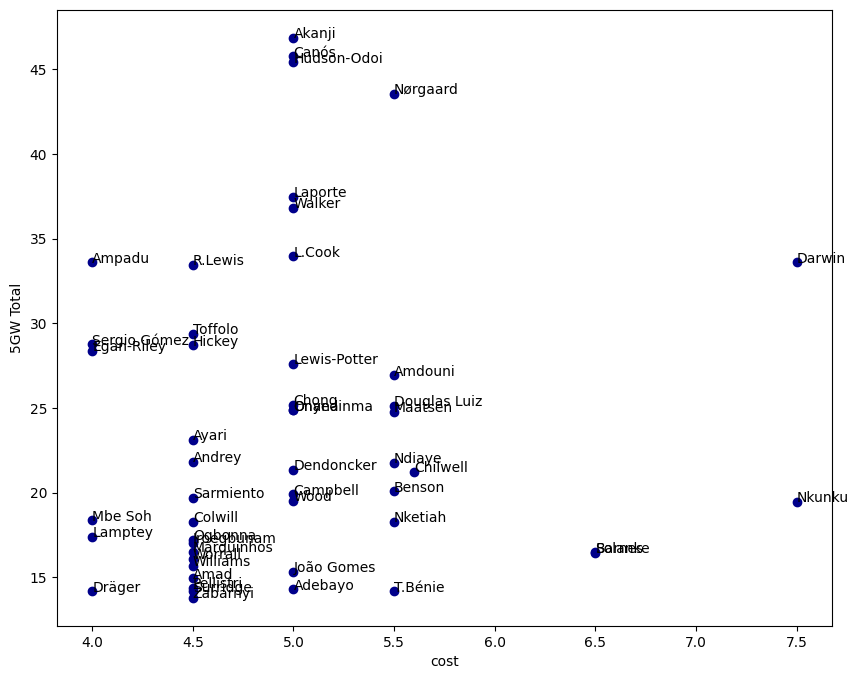

In [95]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

In [96]:
apiplayers = fplwithunderstat.drop(columns=[
'goals_scored',
'points_per_game',
 'player_name',
 'understat',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'
 ])
apiplayers

,id,team,pos,name,cost,selected_by_percent,assists,bps,ict_index,points,minutes,fpl_id,games,time,xG_1wks,xA_1wks
0,1,Arsenal,F,Balogun,4.5,0.7,0,0,0.0,0,0,1,NaN,NaN,NaN,NaN
1,2,Arsenal,D,Cédric,4.0,0.4,0,0,0.0,0,0,2,1,90.0,0.0,0.0
2,3,Arsenal,M,M.Elneny,4.5,0.1,0,0,0.0,0,0,3,NaN,NaN,NaN,NaN
3,4,Arsenal,M,Fábio Vieira,5.5,0.1,0,0,0.0,0,0,4,NaN,NaN,NaN,NaN
4,5,Arsenal,D,Gabriel,5.0,30.9,0,2,0.0,1,4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,572,Wolverhampton Wanderers,D,N.Semedo,4.5,0.3,0,17,4.7,2,90,572,NaN,NaN,NaN,NaN
659,573,Wolverhampton Wanderers,D,Toti,4.5,0.1,0,0,0.0,0,0,573,1,84.0,0.0,0.0
660,574,Wolverhampton Wanderers,M,Boubacar Traore,4.5,0.5,0,0,0.0,0,0,574,1,90.0,0.0,0.0
661,590,Wolverhampton Wanderers,F,Cunha,5.5,0.3,0,3,4.2,2,76,590,NaN,NaN,NaN,NaN


In [97]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,assists,bps,ict_index,points,minutes,fpl_id,games,time,xG_1wks,xA_1wks
411,355,Manchester City,F,Haaland,14.0,90.5,0,56,13.9,13,79,355,NaN,NaN,NaN,NaN
18,19,Arsenal,M,Saka,8.6,63.5,0,37,13.9,10,90,19,1,90.0,0.000000,0.122279
139,131,Brighton,D,Estupiñan,5.0,54.4,1,34,16.0,7,90,131,NaN,NaN,NaN,NaN
453,396,Manchester United,M,Rashford,9.0,49.8,0,5,6.9,3,87,396,NaN,NaN,NaN,NaN
151,143,Brighton,M,Mitoma,6.5,38.6,1,26,11.3,5,90,143,NaN,NaN,NaN,NaN
490,430,Newcastle United,D,Trippier,6.5,33.2,0,22,7.5,2,90,430,NaN,NaN,NaN,NaN
4,5,Arsenal,D,Gabriel,5.0,30.9,0,2,0.0,1,4,5,NaN,NaN,NaN,NaN
350,308,Liverpool,M,Salah,12.5,28.9,1,15,4.9,5,76,308,1,84.0,0.109350,0.000000
459,597,Manchester United,G,Onana,5.0,28.5,0,32,0.0,9,90,597,NaN,NaN,NaN,NaN
431,373,Manchester United,M,B.Fernandes,8.5,27.1,0,13,7.8,3,90,373,NaN,NaN,NaN,NaN


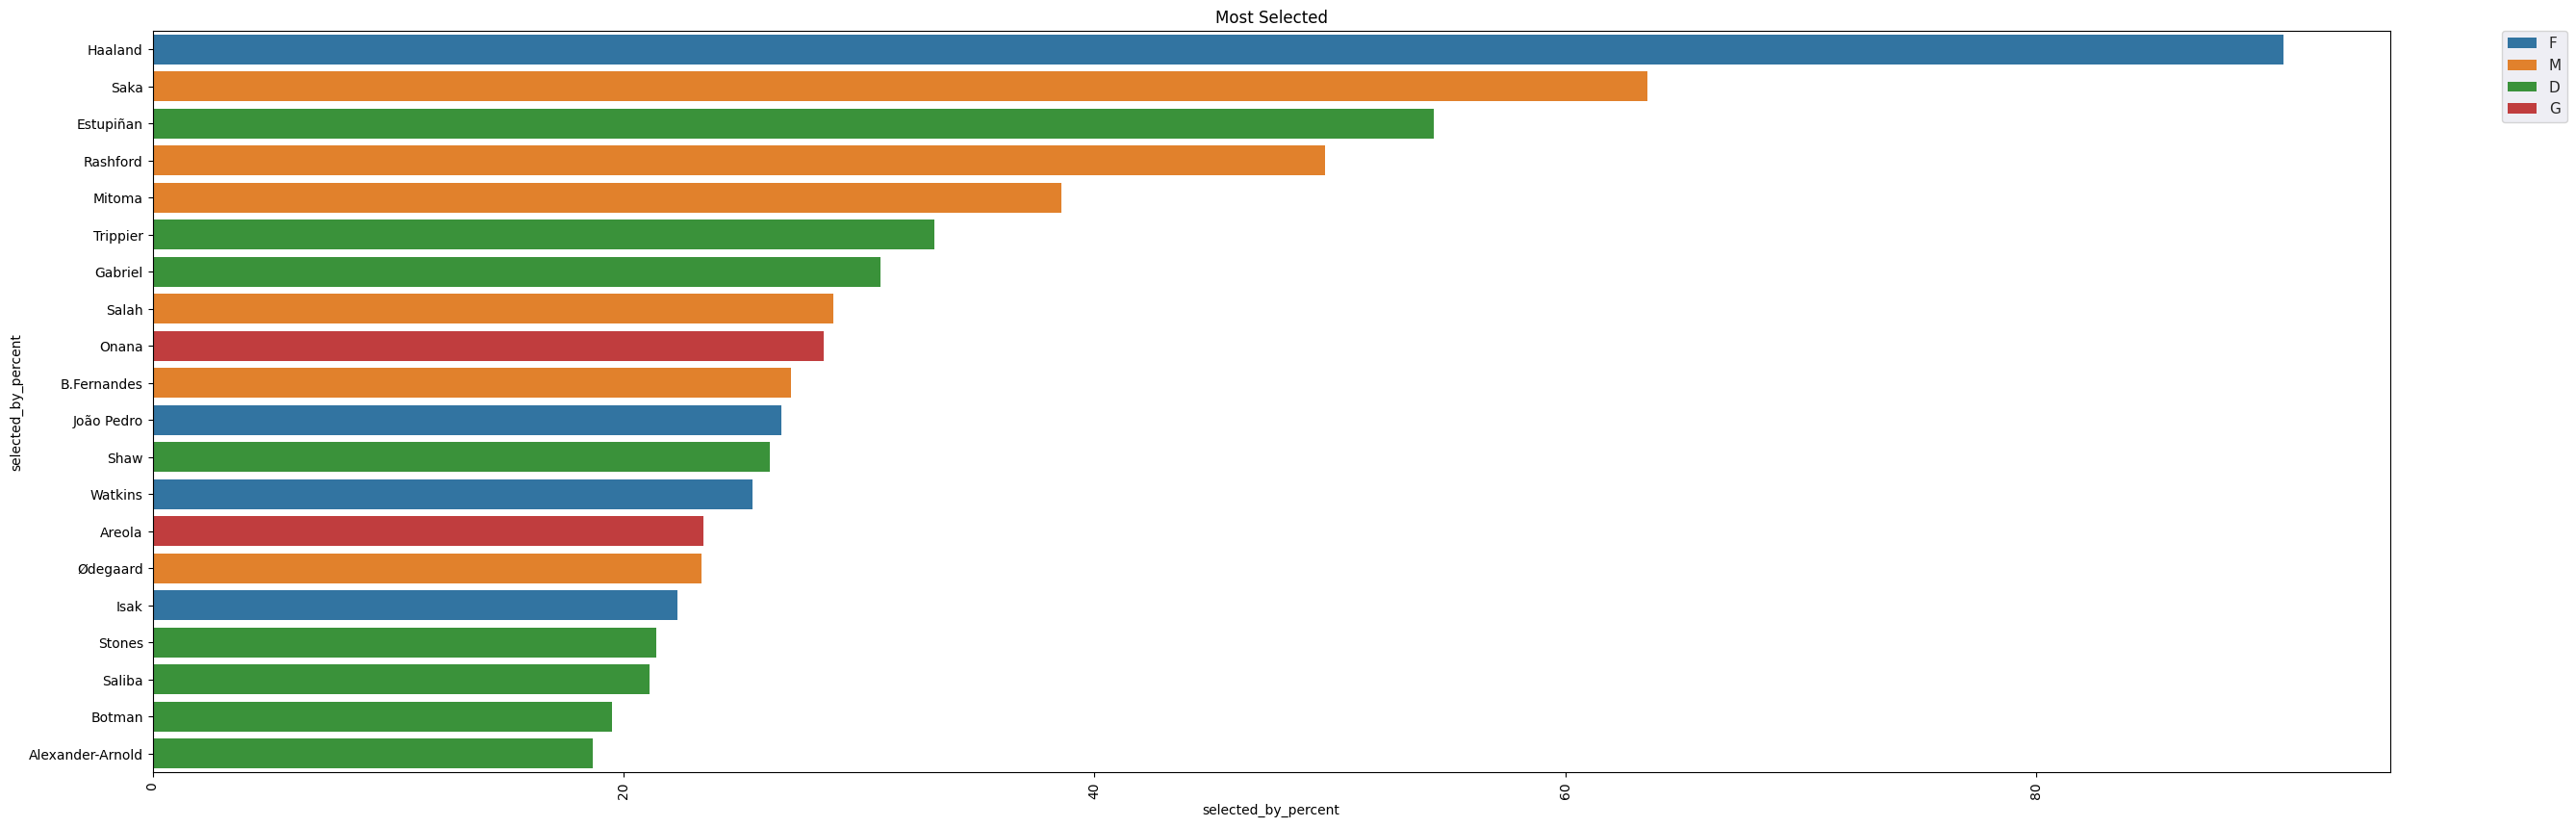

In [98]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [99]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

<ipython-input-99-f34def3770e4>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')


,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Newcastle United,1,1,0,0,5,1,4,3,3.0,3.3,1.8,1.6,1.58,3.686957,3.3,1.8
1,2,Brighton,1,1,0,0,4,1,3,3,3.0,4.0,1.5,2.5,2.54,3.739130,4.0,1.5
2,3,Manchester City,1,1,0,0,3,0,3,3,3.0,1.9,0.3,1.6,1.62,3.947826,1.9,0.3
3,4,Arsenal,1,1,0,0,2,1,1,3,3.0,0.8,1.2,-0.4,-0.35,3.791304,0.8,1.2
4,5,Crystal Palace,1,1,0,0,1,0,1,3,3.0,1.9,0.5,1.4,1.37,3.913043,1.9,0.5
5,6,Fulham,1,1,0,0,1,0,1,3,3.0,1.5,2.7,-1.2,-1.22,3.530435,1.5,2.7
6,7,Manchester United,1,1,0,0,1,0,1,3,3.0,1.5,2.1,-0.7,-0.69,3.634783,1.5,2.1
7,8,Tottenham,1,0,1,0,2,2,0,1,1.0,1.3,2.2,-0.9,-0.94,3.617391,1.3,2.2
8,9,Brentford,1,0,1,0,2,2,0,1,1.0,2.2,1.3,0.9,0.94,3.773913,2.2,1.3
9,10,Liverpool,1,0,1,0,1,1,0,1,1.0,1.3,1.4,-0.1,-0.09,3.756522,1.3,1.4


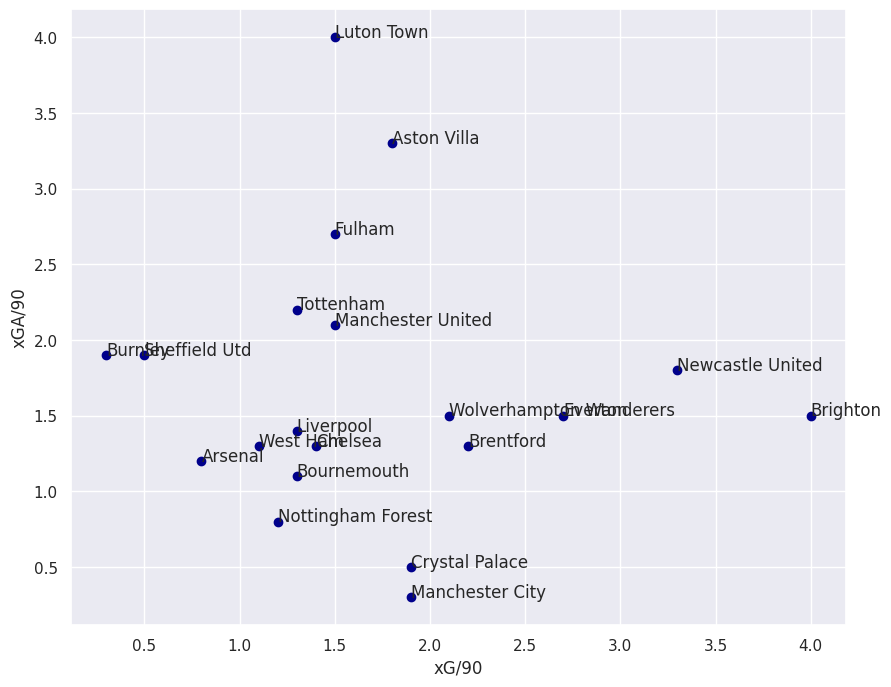

In [100]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [101]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,assists_1wks_y,xA_1wks_y,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,5232,Alexander Isak,1,79,2,1.1635656356811523,0,0,3,0,...,0,0,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133
1,8260,Erling Haaland,1,85,2,0.8820623755455017,0,0.21824727952480316,4,2,...,0,0.21824727952480316,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092
2,468,Callum Wilson,1,11,1,1.220109462738037,0,0,4,0,...,0,0,4,0,0,0,1,1.220109462738037,1.220109462738037,0
3,1679,Dominic Solanke,1,90,1,1.2082340717315674,0,0.08136165887117386,3,2,...,0,0.08136165887117386,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0
4,1776,Jarrod Bowen,1,90,1,0.38786593079566956,0,0.6426277756690979,6,3,...,0,0.6426277756690979,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,11723,Alfie Doughty,1,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,11729,Bénie Traoré,1,88,0,0,0,0.23848271369934082,0,2,...,0,0.23848271369934082,0,2,0,0,0,0,0.23848271369934082,0
299,11730,Anis Ben Slimane,1,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
300,11731,Andre Brooks,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,xA_1wks_y,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals
0,5232,Alexander Isak,1,79,2,1.1635656356811523,0,0,3,0,...,0,3,0,0,0,2,1.1635656356811523,1.0827744007110596,0.44370201230049133,2
1,8260,Erling Haaland,1,85,2,0.8820623755455017,0,0.21824727952480316,4,2,...,0.21824727952480316,4,2,0,0,2,0.8820623755455017,0.6133584380149841,0.01889444887638092,2
2,468,Callum Wilson,1,11,1,1.220109462738037,0,0,4,0,...,0,4,0,0,0,1,1.220109462738037,1.220109462738037,0,1
3,1679,Dominic Solanke,1,90,1,1.2082340717315674,0,0.08136165887117386,3,2,...,0.08136165887117386,3,2,0,0,1,1.2082340717315674,1.2895957231521606,0,1
4,1776,Jarrod Bowen,1,90,1,0.38786593079566956,0,0.6426277756690979,6,3,...,0.6426277756690979,6,3,1,0,1,0.38786593079566956,0.5210804343223572,0.13321448862552643,1
5,2245,Raphael Varane,1,90,1,0.891437828540802,0,0,2,0,...,0,2,0,0,0,1,0.891437828540802,1.0924830436706543,0.3034017086029053,1
6,2496,Rodri,1,90,1,0.7942110300064087,1,0.5058456659317017,4,1,...,0.5058456659317017,4,1,0,0,1,0.7942110300064087,0.8965198397636414,0.8821671605110168,1
7,3697,Odsonne Edouard,1,90,1,1.3628578186035156,0,0.18989571928977966,7,2,...,0.18989571928977966,7,2,0,0,1,1.3628578186035156,1.063220739364624,0.11282532662153244,1
8,5786,Yoane Wissa,1,83,1,0.20050744712352753,0,0.07477104663848877,3,2,...,0.07477104663848877,3,2,0,0,1,0.20050744712352753,0.22781415283679962,0,1
9,6049,Solly March,1,75,1,0.5958764553070068,0,0.058908864855766296,3,2,...,0.058908864855766296,3,2,0,0,1,0.5958764553070068,0.6235096454620361,0,1


In [103]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals,assists
141,6818,James Maddison,1,90,0,0.09061427414417267,2,0.963993489742279,2,6,...,2,6,1,0,0,0.09061427414417267,0.502765417098999,0.28125330805778503,0,2
6,2496,Rodri,1,90,1,0.7942110300064087,1,0.5058456659317017,4,1,...,4,1,0,0,1,0.7942110300064087,0.8965198397636414,0.8821671605110168,1,1
13,6681,Harvey Barnes,1,11,1,0.5019106864929199,1,1.1135693788528442,1,2,...,1,2,0,0,1,0.5019106864929199,1.6154800653457642,0.5929378867149353,1,1
51,672,Jordan Ayew,1,90,0,0.1191428005695343,1,0.7264527678489685,2,2,...,2,2,0,0,0,0.1191428005695343,0.9629577994346619,0.7268648743629456,0,1
57,782,Ben Chilwell,1,90,0,0.26461896300315857,1,0.5630566477775574,1,1,...,1,1,0,0,0,0.26461896300315857,0.5142212510108948,0.24960225820541382,0,1
71,1250,Mohamed Salah,1,84,0,0.20787660777568817,1,0.3949512243270874,3,1,...,3,1,0,0,0,0.20787660777568817,0.6974343657493591,0.09460654854774475,0,1
102,5136,Estupiñán,1,90,0,0.13358382880687714,1,1.3268462419509888,3,6,...,3,6,1,0,0,0.13358382880687714,1.6935917139053345,1.4050401449203491,0,1
110,5584,Aaron Wan-Bissaka,1,90,0,0,1,0.906402587890625,0,3,...,0,3,0,0,0,0,1.2747522592544556,0.3683496117591858,0,1
125,6063,Jacob Murphy,1,1,0,0,1,0.5514945983886719,0,2,...,0,2,0,0,0,0,0.5514945983886719,0,0,1
147,6888,William Saliba,1,90,0,0,1,0.037814829498529434,0,1,...,0,1,0,0,0,0,0.2338154911994934,0.2338154911994934,0,1


In [104]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [105]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [106]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [107]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_1wks_x', 'xG_1wks_x',
       'assists_1wks_x', 'xA_1wks_x', 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'npg_1wks_x', 'npxG_1wks_x',
       'xGChain_x', 'xGBuildup_x', 'games_y', 'time_y', 'goals_season',
       'xG_season', 'assists_season', 'xA_season', 'shots_season',
       'key_passes_season', 'yellow_cards_y', 'red_cards_y', 'npg_season',
       'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games', 'time',
       'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'npg_1wks_y', 'npxG_1wks_y', 'xGChain', 'xGBuildup', 'goals',
       'assists'],
      dtype='object')

In [108]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

KeyError: ignored

In [109]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xG",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

NameError: ignored